In [15]:
import numpy as np
# calculating fidelity between two states using the kernel
from qiskit_aer import AerSimulator
#from qiskit.primitives import Sampler
from cutting_CompUncomp import cutting_CompUncomp
from qiskit_machine_learning.state_fidelities import ComputeUncompute

from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import StatevectorSampler as Sampler
from qiskit_machine_learning.kernels import FidelityQuantumKernel
import numpy as np

from qiskit import QuantumCircuit


from qiskit_machine_learning.utils import algorithm_globals

algorithm_globals.random_seed = 12345



In [16]:
## Dataset
# Example dataset: 2 samples, 16 features total (8 for x, 8 for y)

NUM_QUBITS = 14

dataset = np.array([
    np.random.rand(NUM_QUBITS),
    np.random.rand(NUM_QUBITS)
])
print(dataset)

[[0.81891125 0.77941839 0.74816765 0.19220541 0.35267433 0.54195196
  0.00482996 0.04167627 0.72968713 0.49464608 0.2273653  0.1194865
  0.16689094 0.80327251]
 [0.70118058 0.48537535 0.28433019 0.0743917  0.68995419 0.13370029
  0.13974225 0.36897936 0.57220196 0.97886569 0.35869447 0.73125156
  0.67835207 0.19344512]]


Manual kernel parameters: ParameterView([ParameterVectorElement(x[0]), ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3]), ParameterVectorElement(x[4]), ParameterVectorElement(x[5]), ParameterVectorElement(x[6]), ParameterVectorElement(x[7]), ParameterVectorElement(x[8]), ParameterVectorElement(x[9]), ParameterVectorElement(x[10]), ParameterVectorElement(x[11]), ParameterVectorElement(x[12]), ParameterVectorElement(x[13])])


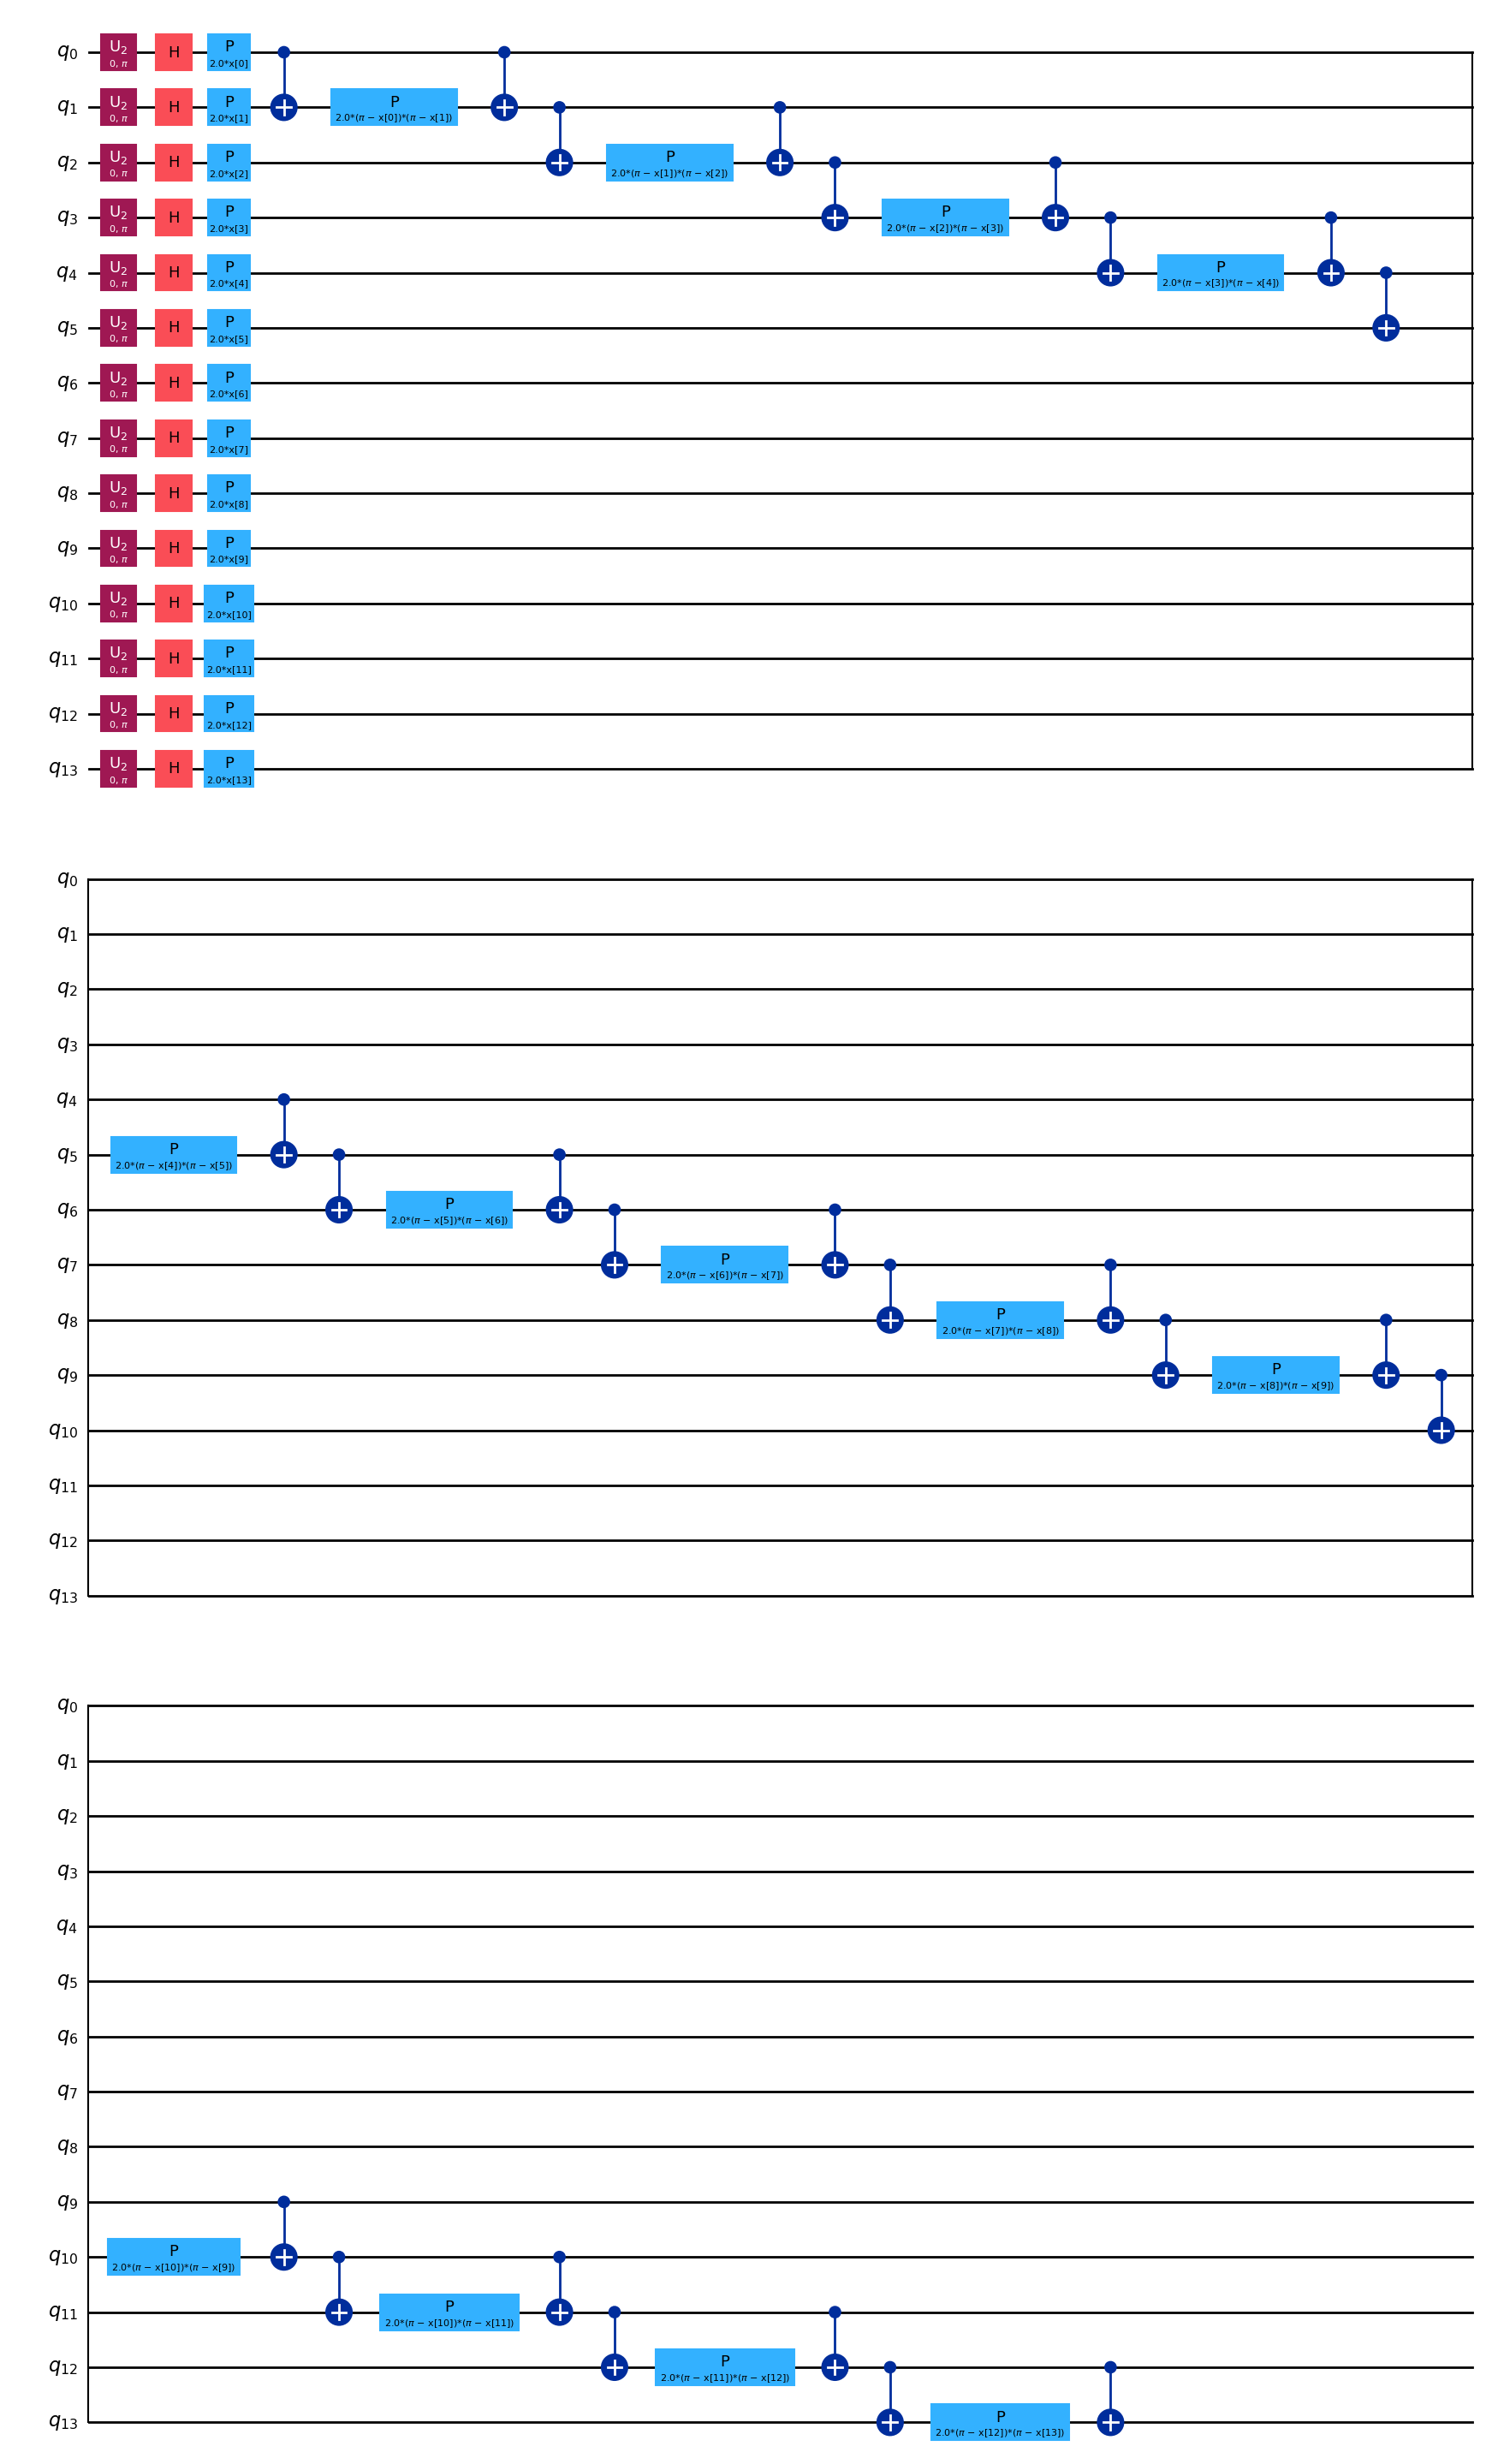

In [17]:
#generate circuit
 
manual_kernel = QuantumCircuit(NUM_QUBITS)

U_map = ZZFeatureMap(feature_dimension=NUM_QUBITS, reps=1, entanglement="linear")

for i in range(NUM_QUBITS):
    manual_kernel.h(i)


manual_kernel = manual_kernel.compose(U_map)

manual_kernel = manual_kernel.decompose()

print(f'Manual kernel parameters: {manual_kernel.parameters}')
manual_kernel.draw("mpl")

In [18]:
fidelity_computer = ComputeUncompute(sampler=Sampler())

fidelities = fidelity_computer.run(
    [manual_kernel],
    [manual_kernel],
    dataset[0],
    dataset[1]
)

print(fidelities.result().fidelities)

[1.0]


In [19]:
fidelity_computer = cutting_CompUncomp(sampler=Sampler())

operator = fidelity_computer.generate_operator(manual_kernel)

print(len(operator))

print(len(operator.paulis))


# manual_kernel.draw("mpl")

# circuits = fidelity_computer._construct_circuits(manual_kernel, manual_kernel)

# print(len(circuits))

fidelities = fidelity_computer._run(
    [manual_kernel],
    [manual_kernel],
    dataset[0],
    dataset[1]
)

print(fidelities)

16384
16384
the number of circuits is 1
the number of values is 1
AAAAAAABBBBBBB
Circuit 0: partitioned.
Circuit 0: cutting experiments generated.
Circuit 0: ISA transpiled subexperiments generated.
Circuits prepped.
A set of jobs sent to the Sampler have been processed.
All jobs sent to the Sampler have been processed.
Job 0 post-processed.
All jobs post-processed.
Reconstruction time: 757.3421370983124s
[np.float64(0.0393447652459156)]


In [26]:
#run this or above cell.
fidelity_computer = cutting_CompUncomp(sampler=Sampler())

fidelities = fidelity_computer.run(
    [manual_kernel],
    [manual_kernel],
    dataset[0],
    dataset[1]
)

print(fidelities.result().fidelities)

the number of circuits is 1
the number of values is 1
AAABBB
Circuit 0: partitioned.
Circuit 0: cutting experiments generated.
Circuit 0: ISA transpiled subexperiments generated.
Circuits prepped.
A set of jobs sent to the Sampler have been processed.
All jobs sent to the Sampler have been processed.
Job 0 post-processed.
All jobs post-processed.
[np.float64(0.6607462614774917)]


In [6]:
fidelities_real = fidelities[0].real

print(fidelities_real)

0.8800228834152501


In [ ]:
kernel_circuitdemo = fidelity_computer.create_fidelity_circuit(manual_kernel, manual_kernel)